In [1]:
#imports
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
file_path = ("./Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df_nomyopia = df_myopia.drop("MYOPIC", axis=1)
df_nomyopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_nomyopia[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])

In [5]:
scaled_data

new_df = pd.DataFrame(scaled_data, columns=df_nomyopia.columns[:])
new_df['MOMMY'] = df_nomyopia['MOMMY']
new_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,-0.996769


# Part 2: Apply Dimensionality Reduction

In [6]:
scaled_data = StandardScaler().fit_transform(new_df)

In [7]:
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)
# pca_transformed_data

In [8]:
# t_SNE = TSNE(learning_rate=45)
t_SNE = TSNE(perplexity=50)
transformed_features = t_SNE.fit_transform(pca_transformed_data)
# transformed_features

In [9]:
transformed_features.shape

(618, 2)

In [10]:
transformed_features

array([[  5.1592946, -12.033771 ],
       [ -5.326687 ,  -8.291885 ],
       [  5.725486 ,  14.793019 ],
       ...,
       [ -6.7320576,  -7.1711826],
       [ 12.955409 ,  11.133461 ],
       [ -7.297446 , -12.36719  ]], dtype=float32)

In [11]:
df_nomyopia["x"] = transformed_features[:,0]
df_nomyopia["y"] = transformed_features[:,1]
df_nomyopia["Myopic"] = df_myopia["MYOPIC"]
df_nomyopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,Myopic
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,5.159295,-12.033771,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-5.326687,-8.291885,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,5.725486,14.793019,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,-6.738165,3.249379,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,4.129608,-6.654324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,10.642776,-8.194904,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,-5.377831,-7.873187,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,-6.732058,-7.171183,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,12.955409,11.133461,0


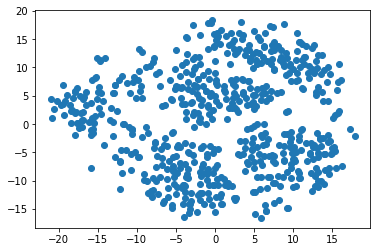

In [12]:
plt.scatter(df_nomyopia["x"], df_nomyopia["y"])
plt.show()

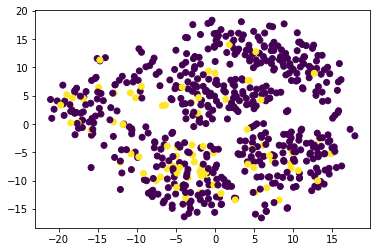

In [13]:
plt.scatter(df_nomyopia["x"], df_nomyopia["y"], c=df_nomyopia["Myopic"])

plt.show()

# Part 3: Perform a Cluster Analysis with K-means

In [14]:
#use first df for PCA
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [15]:
k = list(range(1,11))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


C:\Users\sravi\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


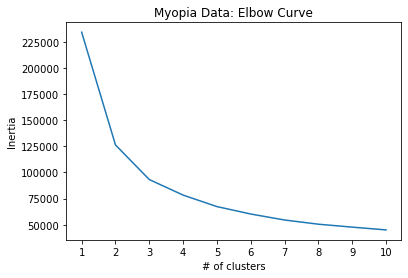

In [16]:
#for loop
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia)
    inertia.append(km.inertia_)
    
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.title('Myopia Data: Elbow Curve')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

#### The elbow occurs around 3 clusters.

In [17]:
def get_clusters(k, df_myopia):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(df_myopia)

    # Predict clusters
    predictions = model.predict(df_myopia)

    # Create return DataFrame with predicted clusters
    df_myopia["Myopia"] = model.labels_

    return df_myopia

In [18]:
clusters = get_clusters(2, df_myopia)
clusters.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,Myopia
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0,0


In [19]:
def show_clusters(clusters):
    plt.scatter(df_myopia['ACD'], df_myopia['VCD'], c=df_myopia['Myopia'])
    plt.xlabel('ACD')
    plt.ylabel('VCD')
    plt.show()

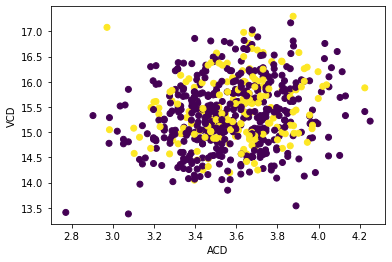

In [20]:
show_clusters(clusters)

# Part 4: Make a Recommendation

<b> Can the patients be clustered? If so, into how many clusters? </b>
After throughly cleaning up and examining the myopia data using unsupervised learning models I was able to establish that patients should be split into groups in order to come to a more accurate conclusion. Therefore the patients cannot be clustered and we would need more data to render a conclusive PCA test.